<a href="https://colab.research.google.com/github/SakshiShende1539/Heart-Disease-Neural-Network/blob/main/Neural_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Sakshi Ankush Shende

PRN: 202402040024

Dataset: Heart Disease Prediction

Assignment 1 -Neural Network Implementation from Scratch

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load Dataset
# -----------------------------
data = pd.read_csv("Heart_Disease_Prediction.csv")

X = data.iloc[:, :-1].values.astype(float) # Convert features to float
y = data.iloc[:, -1].values.reshape(-1, 1)

# Convert 'Presence'/'Absence' to 1/0 for the target variable y
y = np.where(y == 'Presence', 1, 0).astype(float)

# -----------------------------
# 2. Manual Feature Normalization
# -----------------------------
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

# -----------------------------
# 3. Manual Train-Test Split (80-20)
# -----------------------------
train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

# -----------------------------
# 4. Activation Functions
# -----------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

# -----------------------------
# 5. Initialize Parameters
# -----------------------------
np.random.seed(42)

input_size = X_train.shape[1]
hidden_size = 8
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

learning_rate = 0.01
epochs = 50
losses = []





In [13]:
# -----------------------------
# 6. Training Loop
# -----------------------------
for epoch in range(epochs):

    # Forward Propagation
    Z1 = np.dot(X_train, W1) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Loss (Mean Squared Error)
    error = y_train - A2
    loss = np.mean(error ** 2)
    losses.append(loss)

    # Backpropagation
    dZ2 = error * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X_train.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Gradient Descent Update
    W2 += learning_rate * dW2
    b2 += learning_rate * db2

    W1 += learning_rate * dW1
    b1 += learning_rate * db1

    # Print Updated Weights Each Epoch
    print("Epoch:", epoch + 1)
    print("Loss:", loss)
    print("Updated W1:\n", W1)
    print("Updated W2:\n", W2)
    print("-" * 60)

Epoch: 1
Loss: 0.3572339806164563
Updated W1:
 [[ 0.4947664  -0.1349706   0.66438279  1.52495708 -0.23281374 -0.2344227
   1.5697286   0.76720687]
 [-0.47205824  0.54516057 -0.45139828 -0.4638824   0.24536107 -1.91326459
  -1.74865674 -0.56246398]
 [-1.015802    0.3188481  -0.88620519 -1.41010329  1.4697542  -0.22654814
   0.04817684 -1.42501043]
 [-0.54625468  0.11335501 -1.14310342  0.37730132 -0.59943749 -0.29184781
  -0.61272054  1.8521312 ]
 [-0.01402968 -1.05450635  0.83433927 -1.21985048  0.20911669 -1.95949777
  -1.33075985  0.19680665]
 [ 0.73845963  0.17065163 -0.11555297 -0.30129971 -1.47843228 -0.71943131
  -0.46318713  1.05706674]
 [ 0.34209305 -1.75690107  0.34216541 -0.3837267  -0.67580478  0.61135165
   1.02019276  0.93116579]
 [-0.835408   -0.31406498  0.30134374  0.97237345 -0.4830836  -0.18469673
  -1.08188072 -1.19580613]
 [ 0.80909652  1.35954894 -0.05119487  1.00584073  0.36528276 -0.64555598
   0.34226958  1.53773198]
 [-0.03963454  1.56796109 -2.60042472  0.8251

In [14]:
# -----------------------------
# 7. Testing
# -----------------------------
Z1_test = np.dot(X_test, W1) + b1
A1_test = sigmoid(Z1_test)

Z2_test = np.dot(A1_test, W2) + b2
A2_test = sigmoid(Z2_test)

predictions = (A2_test > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)

print("Final Test Accuracy:", accuracy)


Final Test Accuracy: 0.7777777777777778


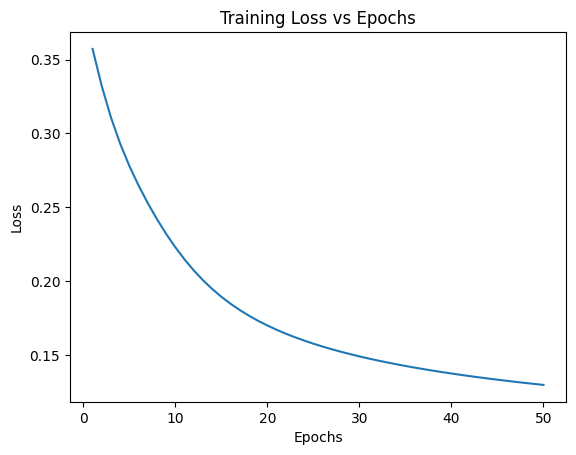

In [15]:
# -----------------------------
# 8. Loss Visualization
# -----------------------------
plt.figure()
plt.plot(range(1, epochs + 1), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs")
plt.show()